In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split , GridSearchCV



In [2]:
# Target names for the 10 digits (0-9)
target_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [3]:
(X_train , y_train), (X_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def plot_image(i):
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.show()

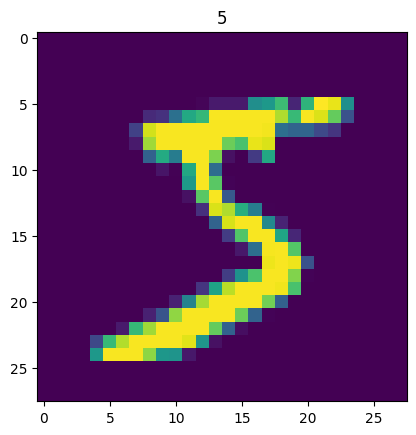

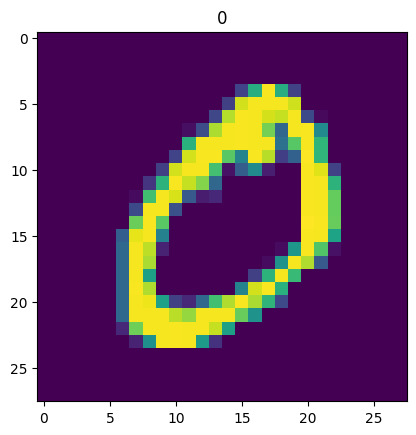

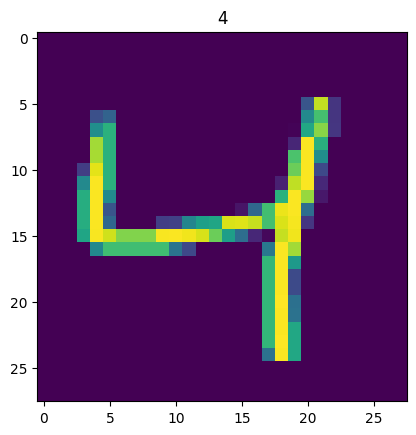

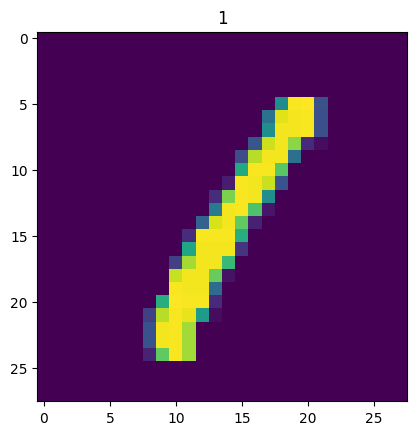

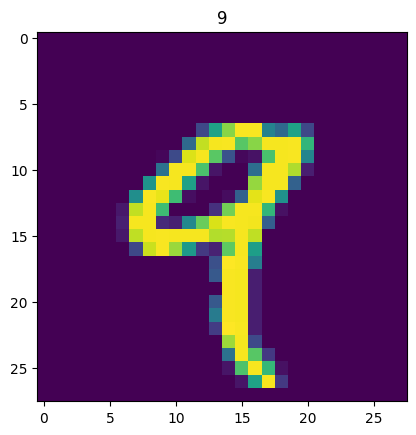

In [5]:
for i in range(5):
    plot_image(i)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [7]:
X_train.shape,X_test.shape,X_val.shape

((48000, 28, 28), (10000, 28, 28), (12000, 28, 28))

In [8]:
X_train = X_train.reshape(X_train.shape[0] , -1)
X_val = X_val.reshape(X_val.shape[0] , -1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [9]:
X_train.shape,X_test.shape,X_val.shape

((48000, 784), (10000, 784), (12000, 784))

In [10]:
print ("Training data: ", X_train.shape, y_train.shape)
print ("Test data: ", X_test.shape, y_test.shape)
print ("Validation data: ", X_val.shape, y_val.shape)

Training data:  (48000, 784) (48000,)
Test data:  (10000, 784) (10000,)
Validation data:  (12000, 784) (12000,)


In [11]:
def images_preprocessing(train,test,val):
    #Normalization
    train = train.astype(np.float32)/255
    test = test.astype(np.float32)/255
    val = val.astype(np.float32)/255

    return train,test,val

In [12]:
X_train,X_test,X_val = images_preprocessing(X_train,X_test,X_val)

In [13]:
dt = DecisionTreeClassifier(max_depth=30,min_samples_split=5,min_samples_leaf=3,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [14]:
y_pred_val = dt.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy_val:.4f}")

Validation Accuracy: 0.8704


In [15]:
def plotting_image_and_prediction (dt,dataset,i):
    # Reshape image before prediction
    image_to_plot = dataset[i].reshape(28, 28)

    dataset_reshaped = np.expand_dims(dataset[i], axis=0)
    predicted_label = dt.predict(dataset_reshaped)

    # Plot the image
    plt.imshow(image_to_plot, cmap='binary')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

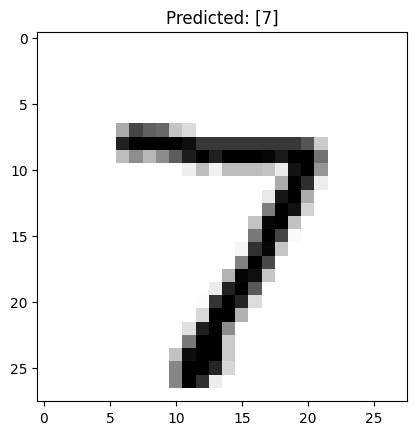

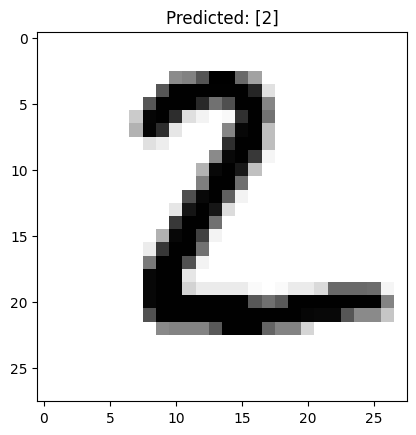

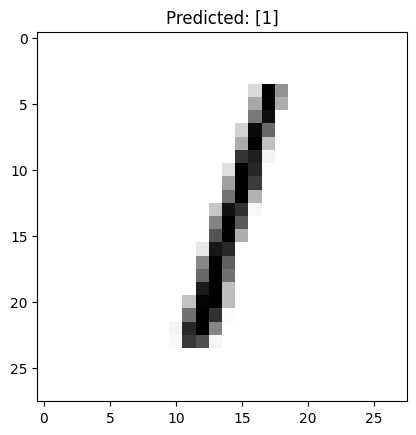

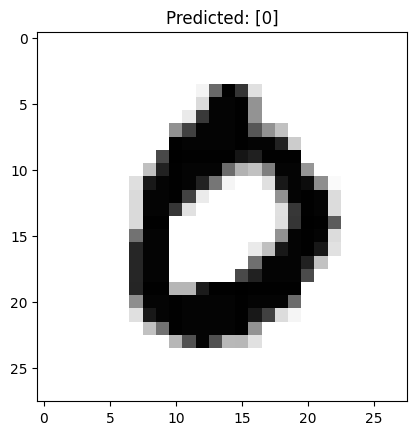

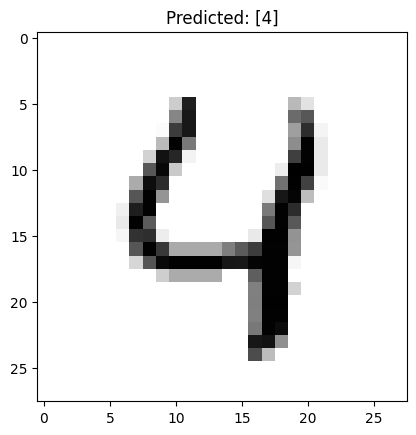

In [16]:
for i in range (5):
    plotting_image_and_prediction(dt,X_test,i)

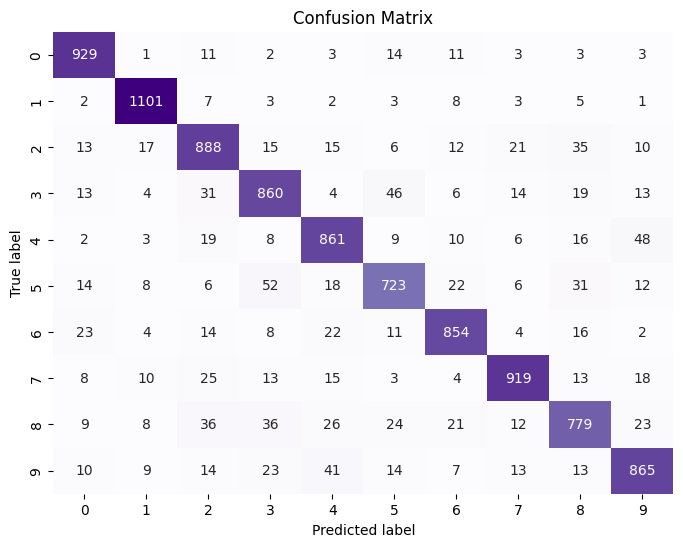

In [17]:
cm = confusion_matrix(y_test,dt.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

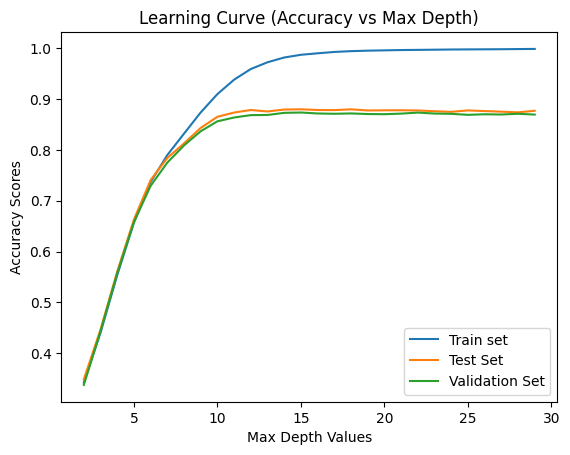

In [18]:
explored_depths = range(2,30)

# Stored in a list
explored_scores_train = []
explored_scores_test = []
explored_scores_val = []

# Create and fit the model
for d in explored_depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    score_train = accuracy_score(y_train, y_pred_train)
    explored_scores_train.append(score_train)

    y_pred_test = clf.predict(X_test)

    score_test = accuracy_score(y_test, y_pred_test)
    explored_scores_test.append(score_test)

    y_pred_val = clf.predict(X_val)
    score_val = accuracy_score(y_val, y_pred_val)
    explored_scores_val.append(score_val)

# Plotting
fig, ax = plt.subplots()
ax.plot(explored_depths, explored_scores_train, label='Train set')
ax.plot(explored_depths, explored_scores_test, label='Test Set')
ax.plot(explored_depths, explored_scores_val, label='Validation Set')

plt.xlabel("Max Depth Values")
plt.ylabel("Accuracy Scores")
plt.title("Learning Curve (Accuracy vs Max Depth)")
plt.legend()
plt.show()


In [20]:
# Identify max_depth
best_depth = explored_depths[np.argmax(explored_scores_test)]
print('Best performance reached at depth of: ', best_depth)

# Retrain the pruned model with best depth
dt = DecisionTreeClassifier(max_depth=best_depth)
dt.fit(X_train, y_train)

Best performance reached at depth of:  15


DecisionTreeClassifier(max_depth=15)

In [21]:
dt.score(X_val,y_val)

0.8745

In [22]:
dt.score(X_test,y_test)

0.8808

In [24]:
# Determine the hardest class
from sklearn.metrics import f1_score
# Average f1 score
av_f1 = f1_score(y_test, dt.predict(X_test), average='micro')
print('Average F1-score: ', av_f1)

# F1-score per class
f = f1_score(y_test, dt.predict(X_test), average=None)
lowest_score = min(f)
hardest_class = target_names[list(f).index(lowest_score)]
print('Hardest class the model struggled with:', hardest_class)

Average F1-score:  0.8808
Hardest class the model struggled with: 8


In [25]:
from joblib import dump
dump(dt, 'handwritten_DT_.joblib')

['handwritten_DT_.joblib']

In [27]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

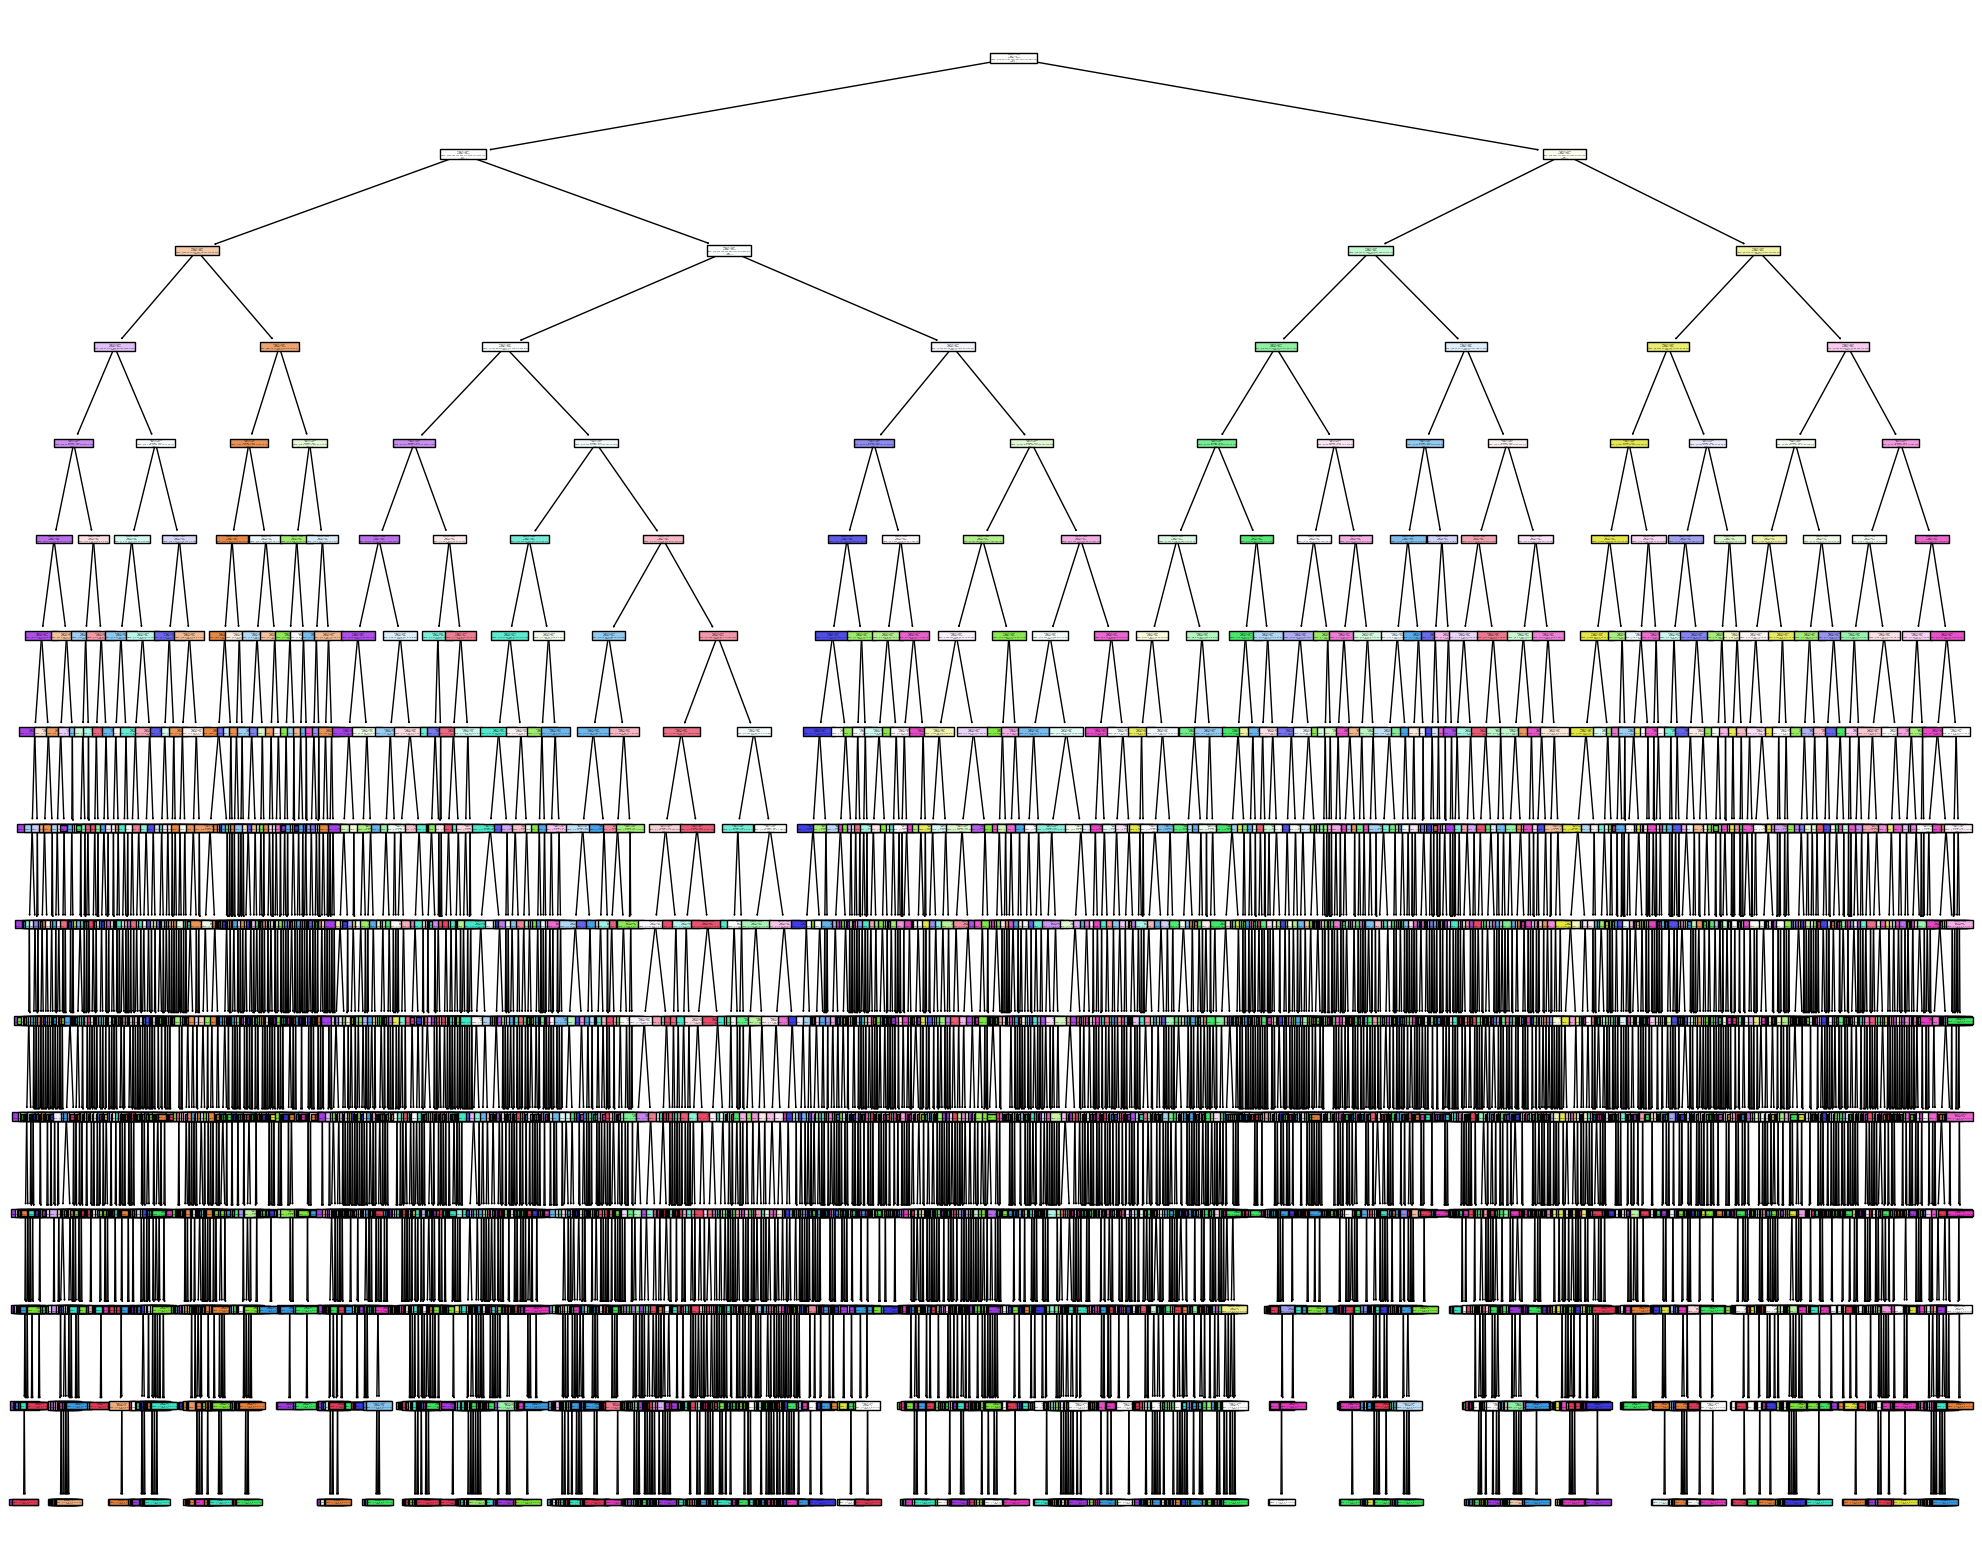

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   class_names=target_names,
                   filled=True)